In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [11]:
df = pd.read_csv('Cleaned_DS_jobs.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

In [13]:
df['job_simp'].value_counts()

data scientist    447
na                 68
analyst            55
data engineer      46
mle                34
manager             7
director            3
Name: job_simp, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

In [15]:
df.job_state.value_counts()

 CA    165
 VA     89
 MA     62
 NY     52
 MD     40
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
 MO     12
 PA     12
US      11
 CO     10
 NJ     10
 NC      9
 GA      9
 FL      8
 TN      8
 OK      6
 WI      6
 IN      5
 MI      5
 AZ      4
 AL      4
 MN      4
 CT      4
 UT      3
 NE      3
 IA      3
 OR      2
 SC      2
 RI      2
 NH      2
 LA      1
 MS      1
 KS      1
 DE      1
 WV      1
Name: job_state, dtype: int64

In [16]:
df.sort_values(by='min_salary')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
463,Data Engineer - Kafka,31-56,Western Digital®\n\nThe next big thing in\ndat...,3.5,Western Digital,"San Jose, CA","San Jose, CA",10000+ employees,Company - Public,Computer Hardware & Software,...,50,1,0,1,1,1,0,0,data engineer,na
460,"VP, Data Science",31-56,"We are looking for a VP, Data Science to lead ...",3.9,7Park Data,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Research & Development,...,8,1,1,0,1,0,0,0,na,na
461,Senior Business Intelligence Analyst,31-56,Position Overview:\n\nThe Senior Business Inte...,3.7,Protolabs,"Maple Plain, MN","Maple Plain, MN",1001 to 5000 employees,Company - Public,Miscellaneous Manufacturing,...,21,0,0,0,0,0,0,0,analyst,senior
462,Data Scientist,31-56,"The Perduco Group, a LinQuest company, is seek...",3.9,LinQuest,"Colorado Springs, CO","Los Angeles, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,...,16,1,1,0,0,0,1,0,data scientist,na
464,Data Scientist,31-56,Data Scientist\n\nTrexquant is a systematic he...,4.0,Trexquant Investment,United States,"Stamford, CT",1 to 50 employees,Company - Private,Investment Banking & Asset Management,...,8,1,0,0,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Data Scientist(s)/Machine Learning Engineer,212-331,Company: AI/Data Science\nLocation: New York C...,5.0,Blue Horizon Tek Solutions,"New York, NY","Coconut Creek, FL",1 to 50 employees,Company - Private,Staffing & Outsourcing,...,33,1,1,0,0,0,0,0,data scientist,na
501,Data Scientist,212-331,Position: Data Scientist\nLocation: Denver\nSt...,3.6,Creative Circle,United States,"Los Angeles, CA",201 to 500 employees,Company - Public,Staffing & Outsourcing,...,18,1,0,0,0,0,0,0,data scientist,na
500,"Real World Science, Data Scientist",212-331,"Title: Real World Science, Data Scientist\nLoc...",4.0,AstraZeneca,"Wilmington, DE","Cambridge, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,...,107,1,0,1,0,0,0,0,data scientist,na
510,"Scientist / Group Lead, Cancer Biology",212-331,"Scientist / Group Lead, Cancer Biology\nLocati...",0.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,...,-1,0,1,0,0,0,0,0,na,senior


In [17]:
df.describe()

,Rating,min_salary,max_salary,avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3.587424,99.296970,148.301515,123.612121,0.407576,29.736364,0.730303,0.440909,0.212121,0.281818,0.260606,0.184848,0.206061
std,1.183540,33.161485,48.264588,39.786698,0.491756,39.763033,0.444139,0.496873,0.409120,0.450226,0.439298,0.388469,0.404781
min,0.000000,31.000000,56.000000,43.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,122.000000,165.000000,136.000000,1.000000,37.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,212.000000,331.000000,271.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


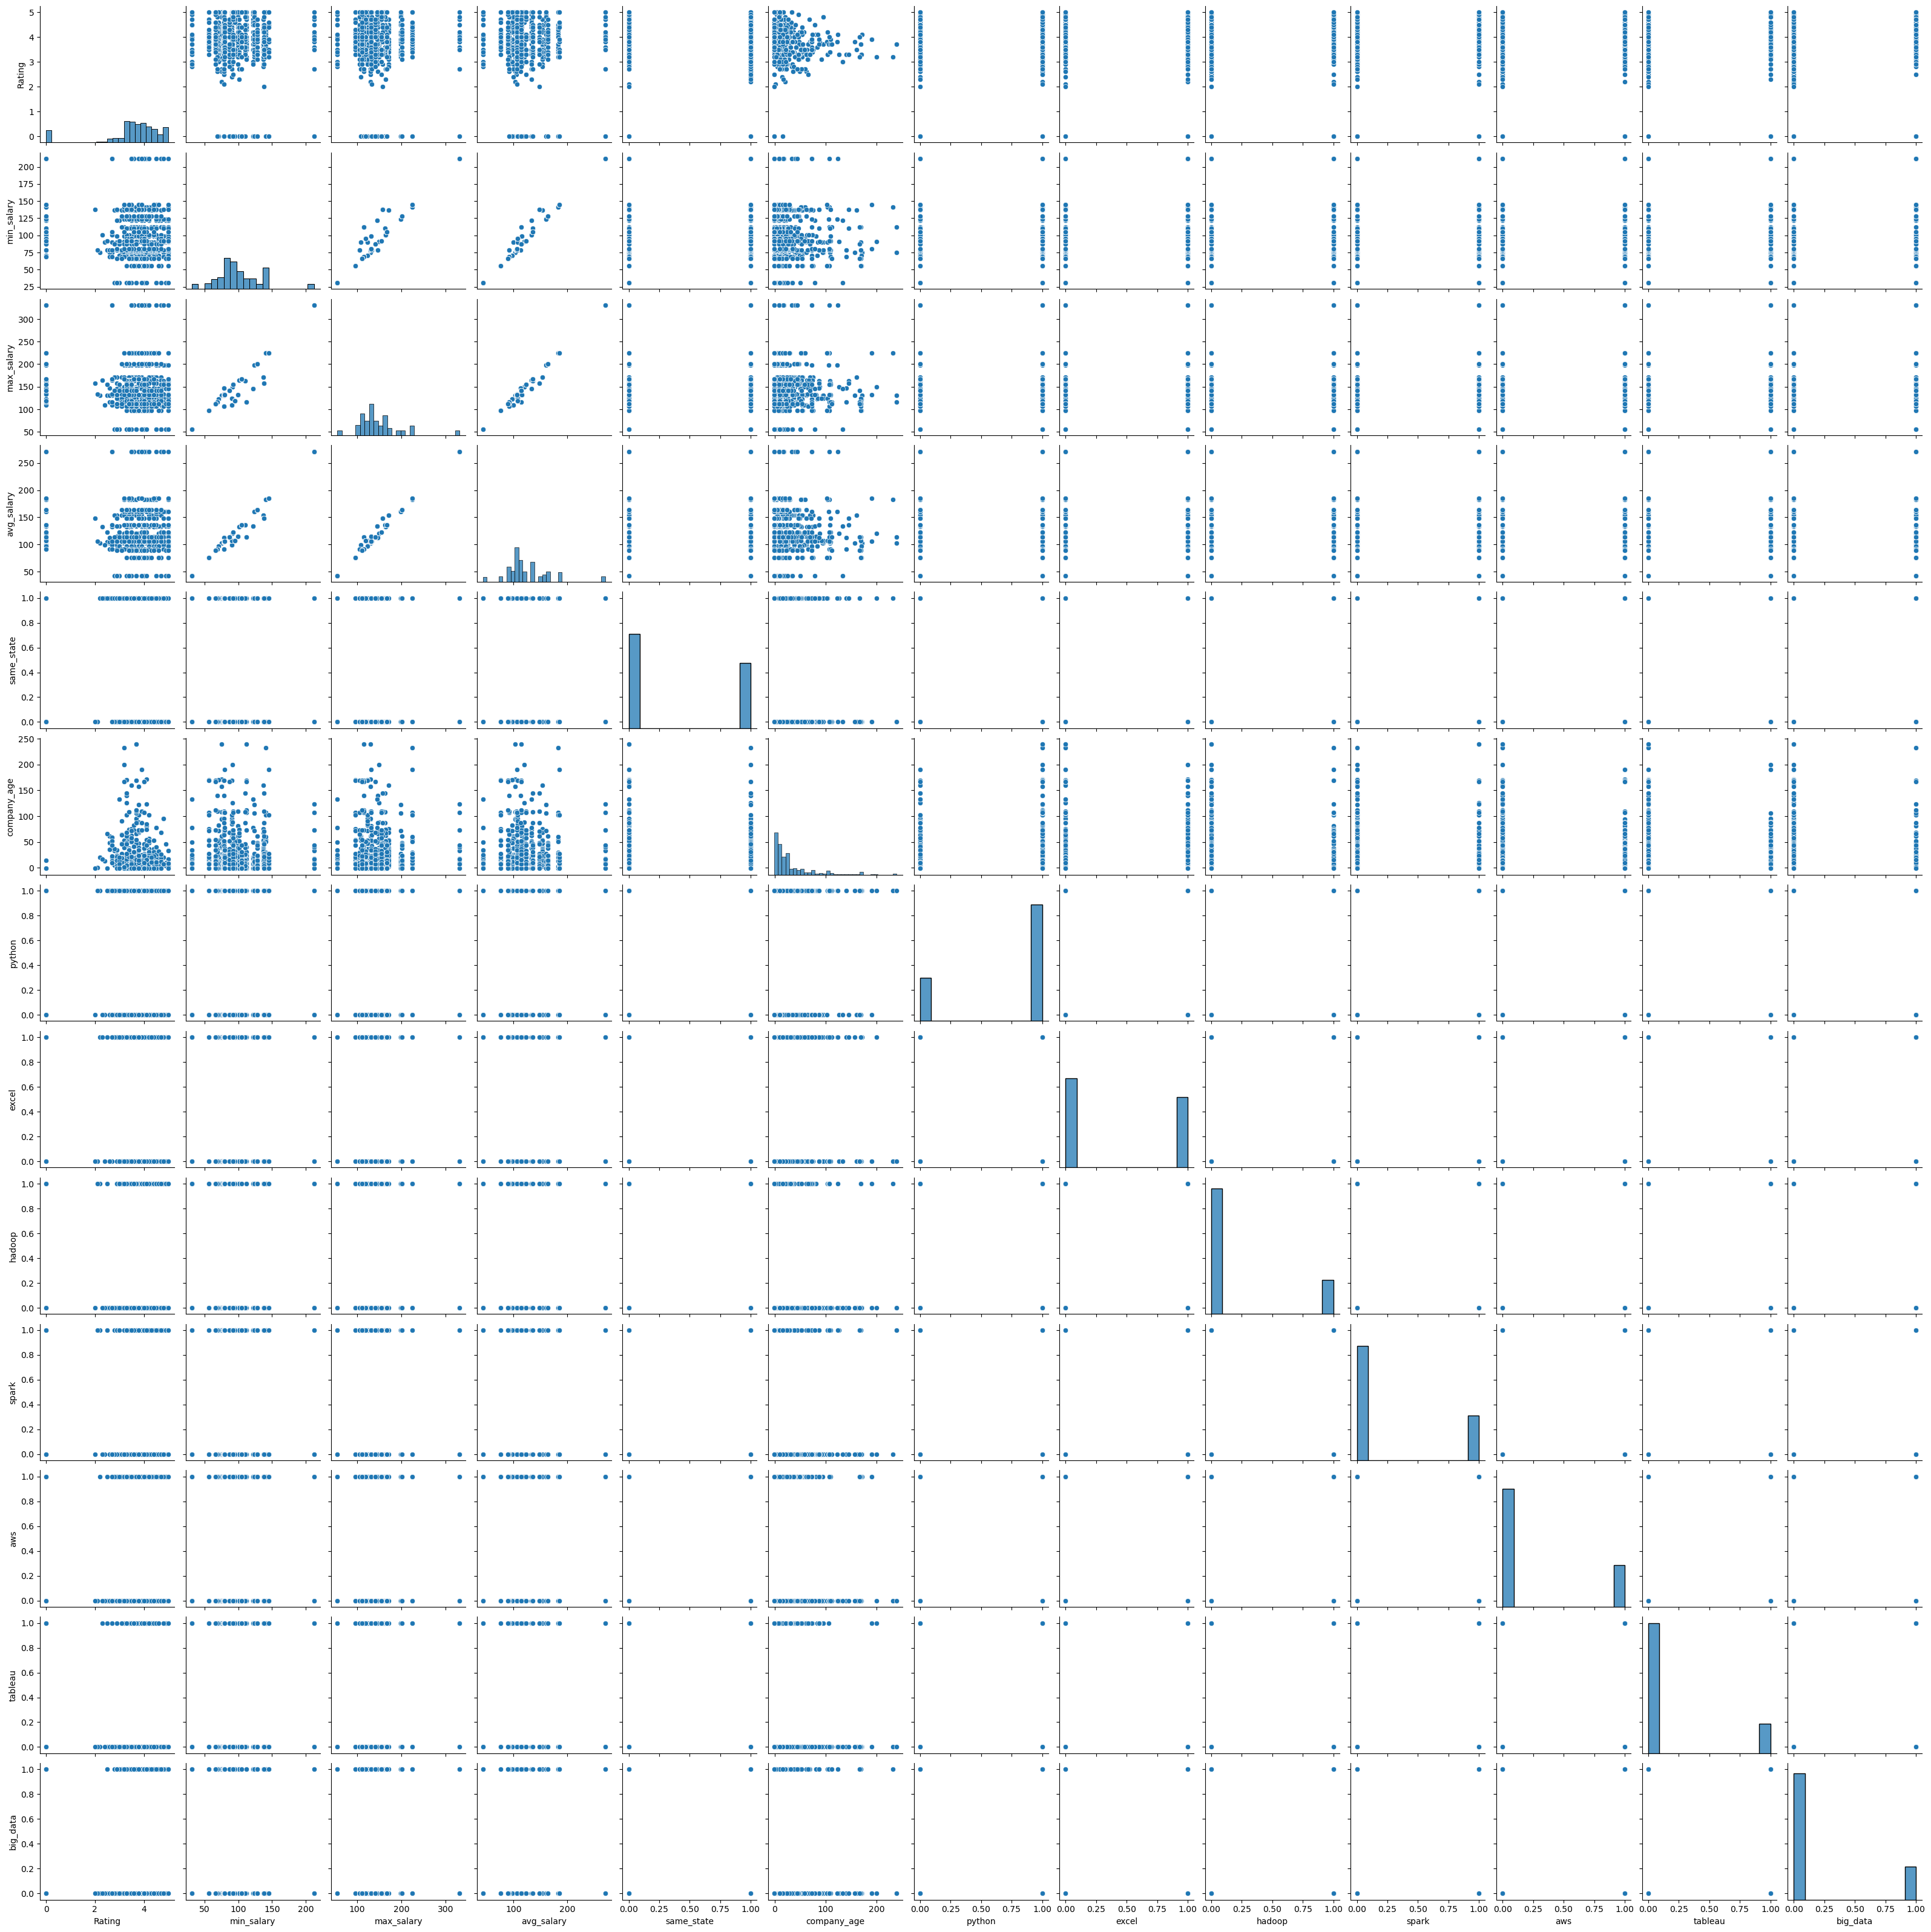

In [18]:
sns.pairplot(df)

<AxesSubplot:>

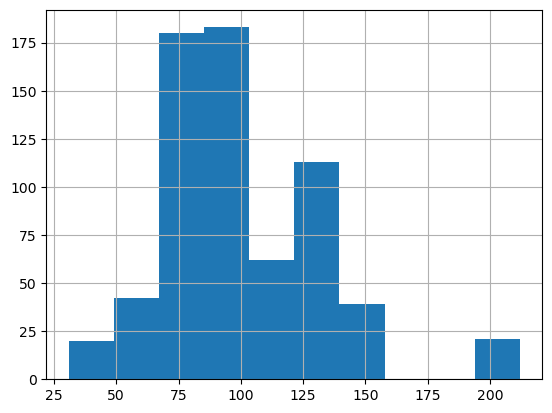

In [19]:
df.min_salary.hist()

<AxesSubplot:xlabel='avg_salary'>

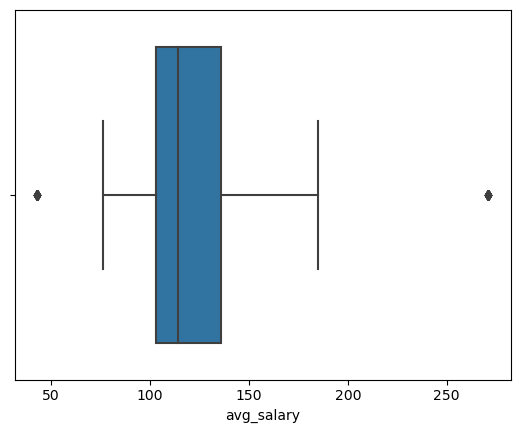

In [20]:
sns.boxplot(x=df["avg_salary"])

<AxesSubplot:xlabel='company_age'>

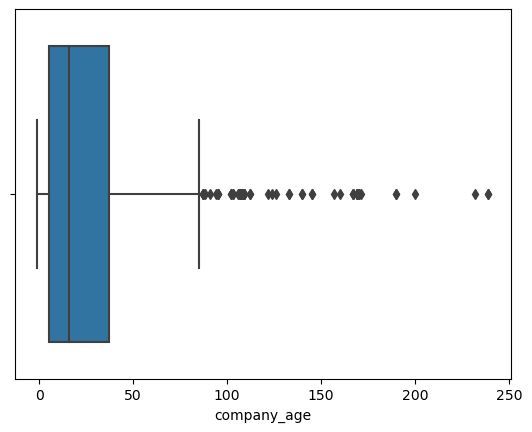

In [21]:
sns.boxplot(x=df["company_age"])

<AxesSubplot:xlabel='avg_salary'>

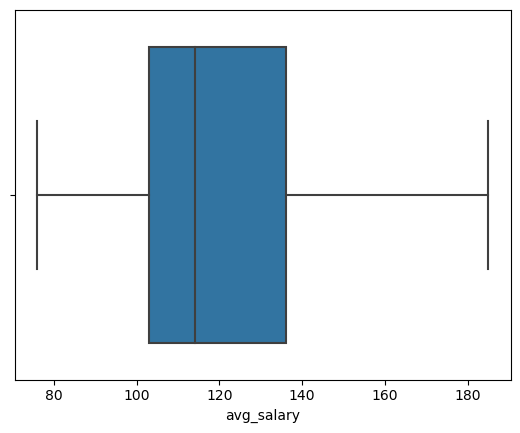

In [22]:
df = df[(df.avg_salary>50)&(df.avg_salary<200)]
sns.boxplot(x=df["avg_salary"])

In [23]:
df.shape

(619, 27)

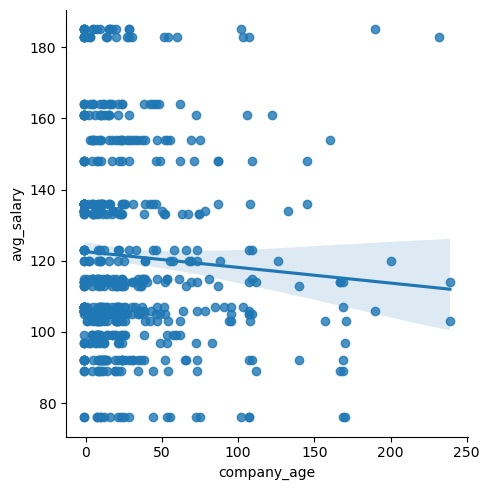

In [24]:
sns.lmplot(x='company_age',y='avg_salary',data=df)

<AxesSubplot:>

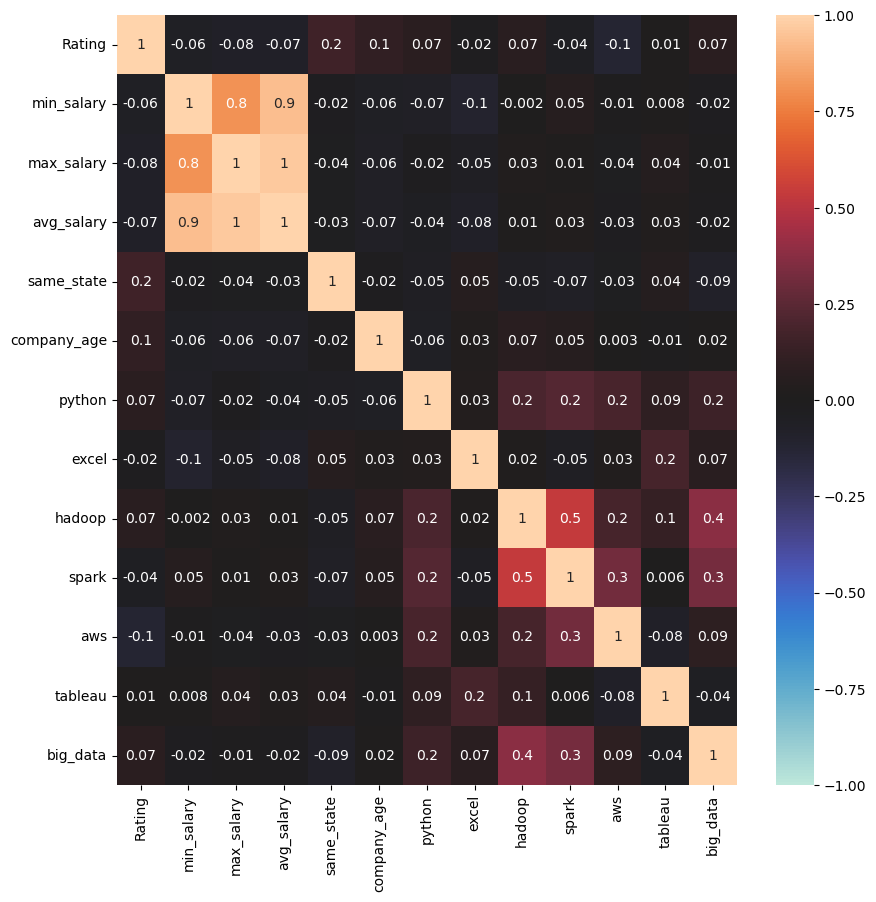

In [25]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)

<AxesSubplot:>

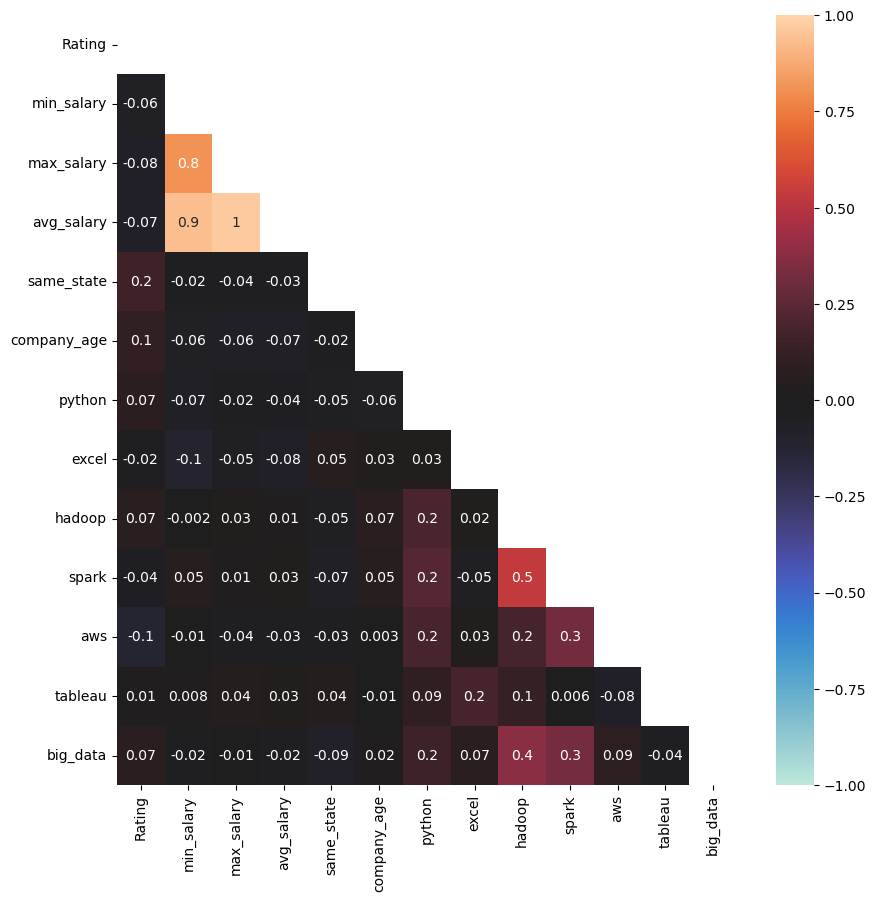

In [42]:

fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, ax=ax)

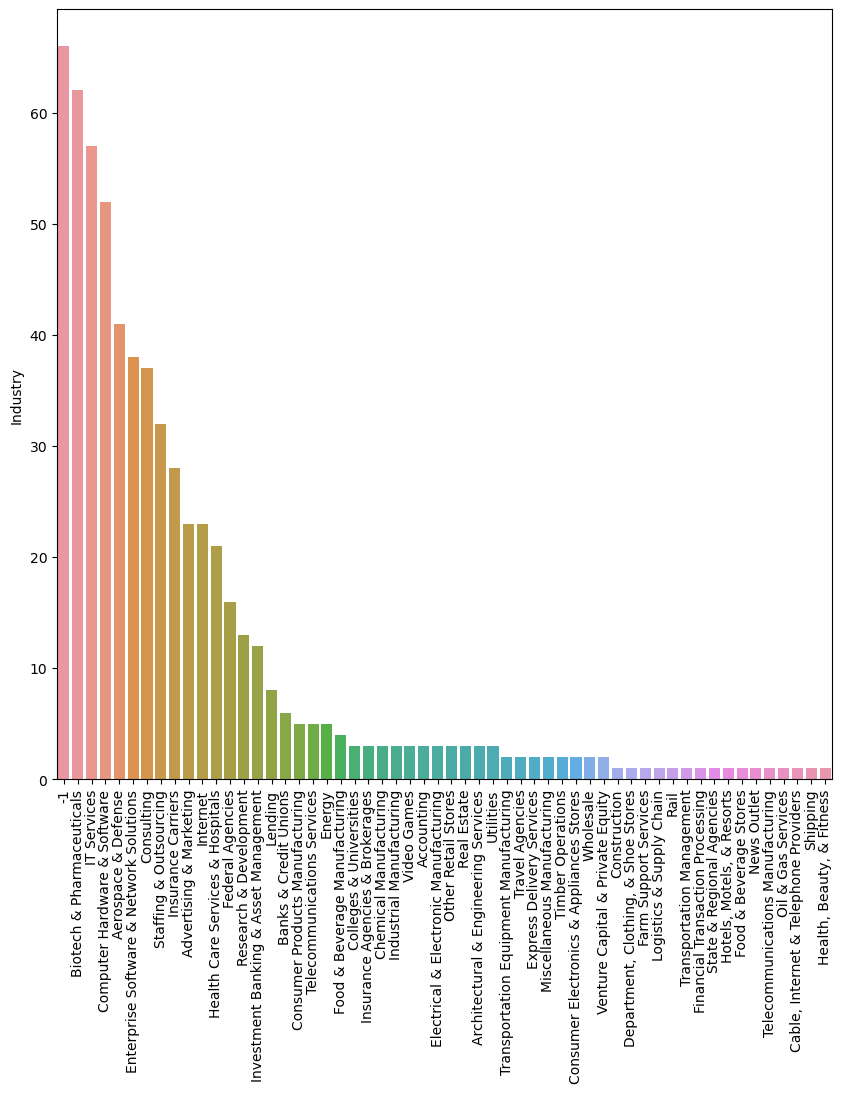

In [27]:

fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.Industry.value_counts().index, y=df.Industry.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.savefig('job industry count.png')

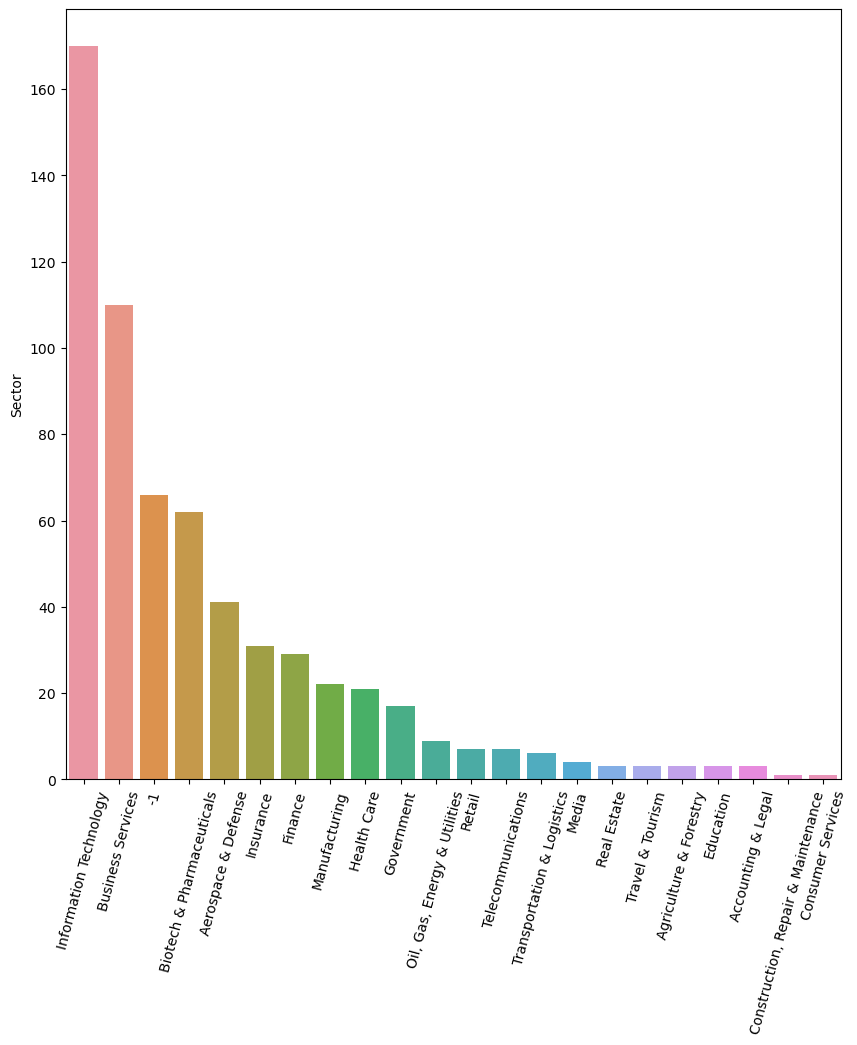

In [28]:

fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.Sector.value_counts().index, y=df.Sector.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=75)

plt.savefig('job sector count.png')

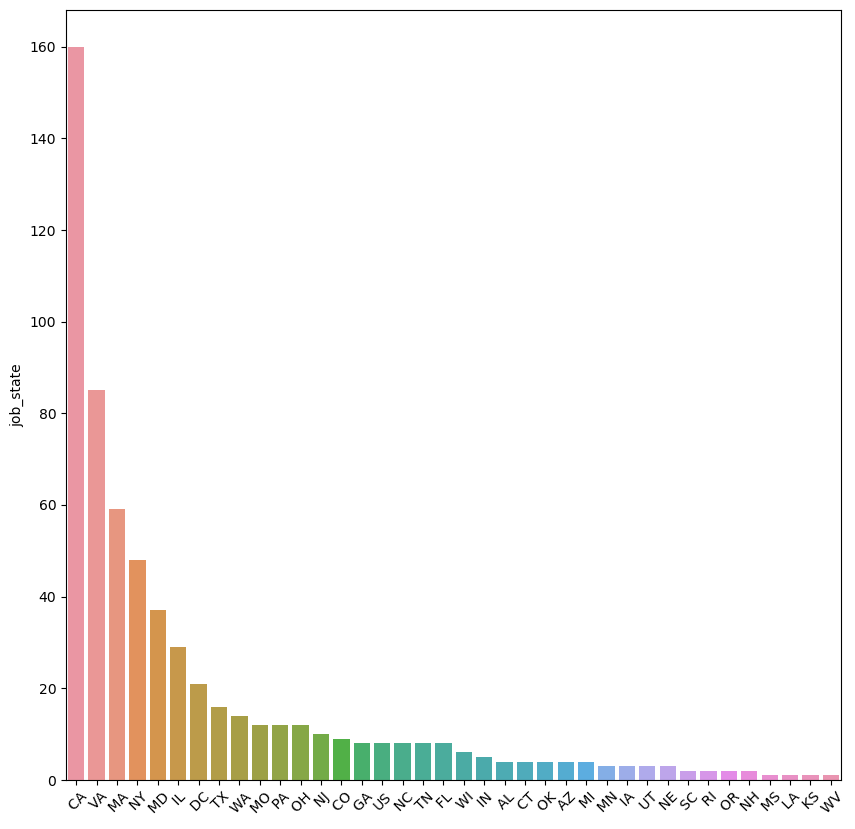

In [29]:

fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.job_state.value_counts().index, y=df.job_state.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.savefig('job state count.png')

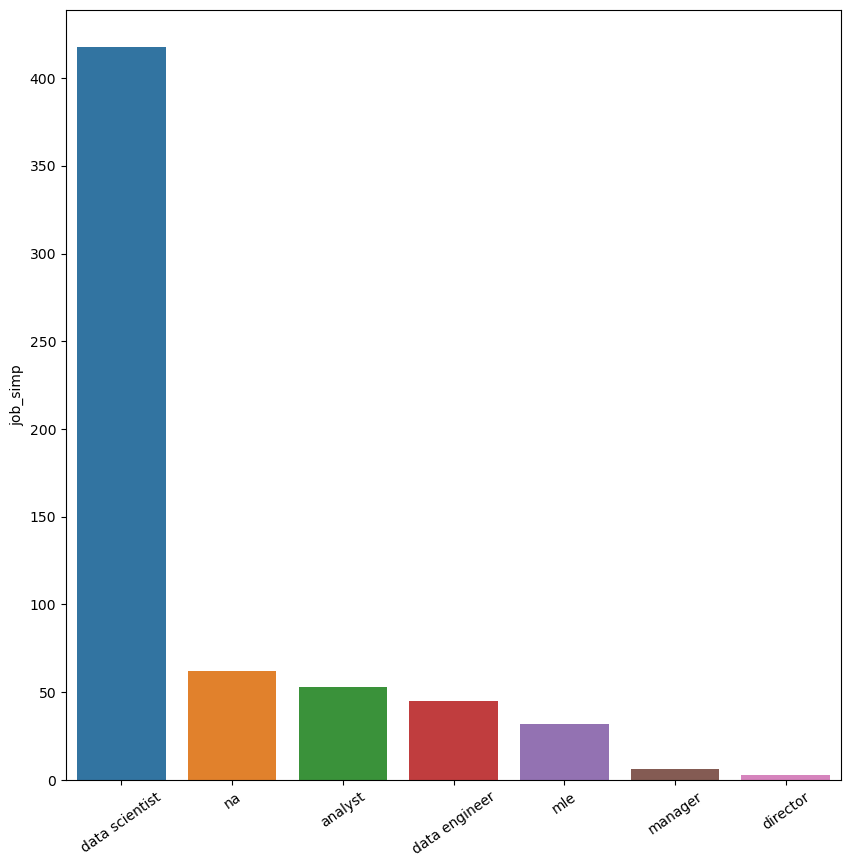

In [30]:

fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.job_simp.value_counts().index, y=df.job_simp.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=35)

plt.savefig('job title count.png')

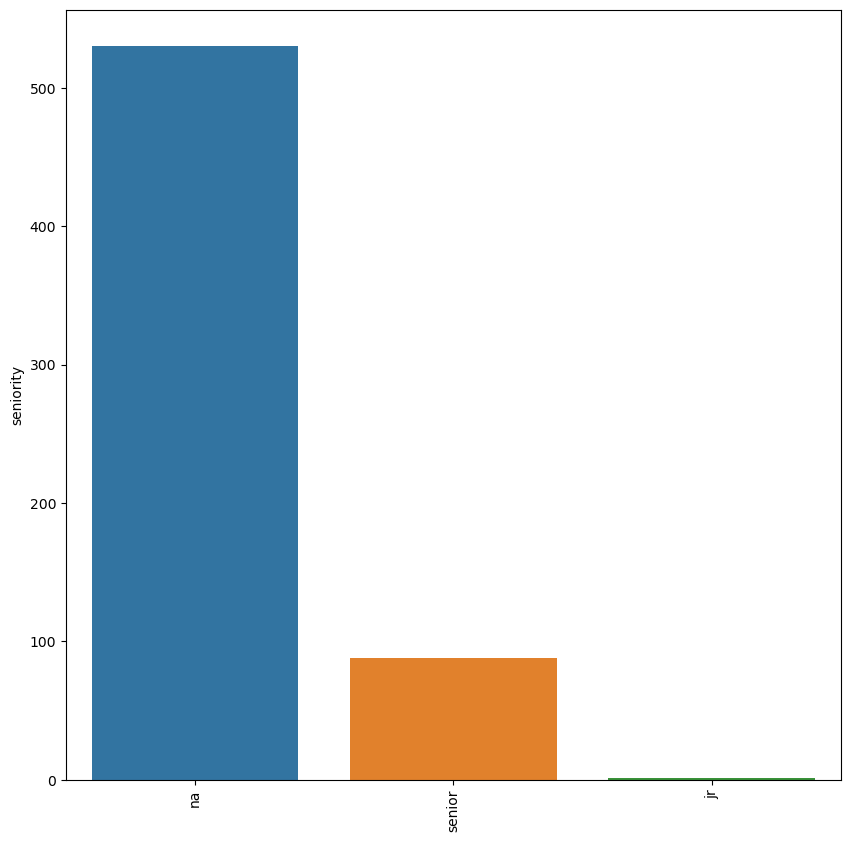

In [31]:


fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.seniority.value_counts().index, y=df.seniority.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.savefig('sr.png')

In [32]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,118.264151
data engineer,115.355556
data scientist,122.791866
director,127.000000
manager,115.666667
mle,115.625000
na,120.516129


In [33]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary').sort_values('avg_salary', ascending =False)

,,avg_salary
job_simp,seniority,
director,senior,130.500000
na,senior,129.000000
mle,senior,126.666667
data scientist,na,123.746631
analyst,senior,121.125000
director,na,120.000000
manager,senior,120.000000
na,na,119.436364
analyst,na,118.166667


In [34]:
pd.pivot_table(df, index='job_state', values='avg_salary').sort_values('avg_salary', ascending =False)

,avg_salary
job_state,
WI,144.333333
AZ,140.750000
IA,140.666667
MI,137.750000
NC,134.750000
MS,133.000000
NH,132.000000
OR,131.500000
AL,131.000000


In [35]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending =False)

avg_salary
job_state job_simp                  
US        data scientist           7
          data engineer            1
 WV       data scientist           1
 WI       na                       1
          data scientist           4
          analyst                  1
 WA       mle                      1
          data scientist          12
          analyst                  1
 VA       data scientist          62
          analyst                  8
          data engineer            5
          mle                      5
          na                       5
 UT       data scientist           1
          data engineer            2
 TX       na                       2
          data scientist          11
          analyst                  3
 TN       mle                      1
          data scientist           5
          analyst                  2
 SC       na                       1
          analyst                  1
 RI       director                 2
 PA       data scientist           5
          analyst                  4
          na                       1
          mle                      2
 OR       mle                      1
          data scientist           1
 OK       na                       3
          analyst                  1
 OH       na                       1
          mle                      1
          data scientist           8
          data engineer            2
 NY       data engineer            4
          analyst                  1
          data scientist          38
          mle                      3
          na                       2
 NJ       na                       1
          data scientist           8
          analyst                  1
 NH       mle                      1
          data scientist           1
 NE       data scientist           2
          analyst                  1
 NC       data scientist           1
          na                       3
          mle                      2
          data engineer            1
          analyst                  1
 MS       na                       1
 MO       data scientist           9
          data engineer            2
          analyst                  1
 MN       data scientist           1
          analyst                  2
 MI       manager                  1
          data scientist           3
 MD       data scientist          25
          na                       7
          data engineer            3
          analyst                  2
 MA       director                 1
          analyst                  1
          data scientist          36
          na                      17
          manager                  1
          mle                      3
 LA       analyst                  1
 KS       data scientist           1
 IN       data scientist           1
          data engineer            1
          analyst                  2
          na                       1
 IL       analyst                  3
          data scientist          19
          data engineer            2
          na                       3
          mle                      2
 IA       analyst                  3
 GA       data scientist           8
 FL       na                       2
          data scientist           2
          data engineer            4
 DC       data scientist          20
          analyst                  1
 CT       data scientist           2
          data engineer            2
 CO       data scientist           8
          mle                      1
 CA       na                       8
          mle                      9
          manager                  4
          data scientist         113
          data engineer           14
          analyst                 12
 AZ       na                       1
          data scientist           2
          data engineer            1
 AL       na                       2
          data scientist           1
          data engineer            1

In [36]:
pd.pivot_table(df[df.job_simp=='data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending =False)

,avg_salary
job_state,
NH,161.000000
MI,150.666667
AZ,147.000000
WI,144.000000
PA,136.600000
NC,136.000000
NY,131.342105
TX,126.181818
FL,125.500000


In [37]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


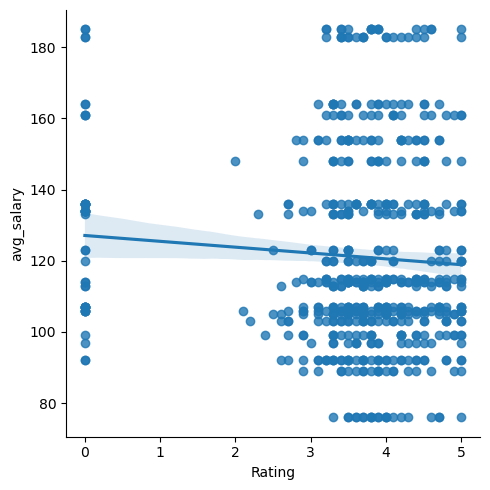

In [40]:
sns.lmplot(x='Rating',y='avg_salary',data=df)

In [41]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na
